In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import librosa
import librosa.display
import soundfile as sf
import matplotlib.pyplot as plt
import IPython.display as ipd

In [ ]:
# diretório de entrada
DIR_ENTRADA = 'mp3'

# diretório de saída
DIR_SAIDA = 'wavbal5'

# duração de cada trecho de áudio
DURACAO_TRECHO = 5 # segundos
SAMPLE_RATE = 16000 # 16 kHz

In [ ]:
especies = os.listdir(DIR_ENTRADA)
especies

In [ ]:
arquivos = []
for especie in especies:
    arquivos.append(len(os.listdir(DIR_ENTRADA + '/' + especie)))
arquivos

In [ ]:
df = pd.DataFrame({
    'especie': especies,
    'arquivos': arquivos
})

#total_arquivos = sum(df['arquivos'])
maior_qtde = max(df['arquivos'])
df['diferenca'] = maior_qtde - df['arquivos']
df['multiplicacao'] = df[['diferenca', 'arquivos']].apply(lambda x: np.round(x[0] / x[1], 2), axis=1)
#df['adicional'] = 
df

In [ ]:
# excluir diretórios de saída
import shutil
shutil.rmtree(DIR_SAIDA)
print(DIR_SAIDA)

In [ ]:
# criar diretórios de saída

if not os.path.isdir(DIR_SAIDA):
    os.mkdir(DIR_SAIDA)
print(DIR_SAIDA)

for especie in especies:
    dir_especie = os.path.join(DIR_SAIDA, especie)
    if not os.path.isdir(dir_especie):
        os.mkdir(dir_especie)
    print(dir_especie)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%%time

PONTOS_ONDA = SAMPLE_RATE * DURACAO_TRECHO # 16 kHz * 5 s = 80000

for especie in especies:
    for arquivo in os.listdir(os.path.join(DIR_ENTRADA, especie)):
#    for arquivo in os.listdir(os.path.join(DIR_ENTRADA, especie))[:20]:

        # 
        entrada = os.path.join(DIR_ENTRADA, especie, arquivo)
        if not entrada.endswith('.mp3'):
            continue
        #print("entrada:", entrada)

        prefixo_saida = os.path.join(DIR_SAIDA, especie, arquivo.replace('.mp3', '-'))
        #print("prefixo_saida:", prefixo_saida)
        
        # carregar áudio original em formato MP3
        y, sr = librosa.load(entrada, sr=SAMPLE_RATE, mono=True)
        #y, sr = librosa.load(entrada, sr=44100, mono=True)
        #duracao = y.shape[0] / sr

        # remover silêncio nas extremidades do áudio
        yt, index = librosa.effects.trim(y)
        duracao = yt.shape[0] / sr
        
        # calcular o número de cortes a serem efetuados no áudio
        numero_cortes = round(duracao / DURACAO_TRECHO)
        if numero_cortes == 0:
            continue
        
        for corte in np.arange(1, numero_cortes + 1):
            saida = prefixo_saida + "0-" + str(corte) + ".wav"
            
            # calcular trechos de início e fim no áudio
            inicio = PONTOS_ONDA * (corte - 1)
            termino = PONTOS_ONDA * corte
            ytc = yt[inicio:termino]
            
            # gravar arquivo de áudio em formato WAV
            sf.write(saida, ytc, sr, format='wav', subtype='PCM_16')

In [ ]:
import IPython.display as ipd

In [ ]:
filename = 'wavbal5/mimus_saturninus/Mimus232726-0-1.wav'
#waveform, label = get_waveform_and_label(filename)
#print(label, waveform.shape)
#display.display(display.Audio(waveform, rate=16000))
#display.display(display.Audio(waveform, rate=16000))
ipd.display(ipd.Audio(filename))

In [ ]:
filename = 'wavbal5s/mimus_saturninus/Mimus232726-1.wav'
#waveform, label = get_waveform_and_label(filename)
#print(label, waveform.shape)
#display.display(display.Audio(waveform, rate=16000))
ipd.display(ipd.Audio(filename))

In [93]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [94]:
import warnings
warnings.filterwarnings('ignore')

In [95]:
# duração de cada trecho de áudio
DURACAO_TRECHO = 5 # segundos
SAMPLE_RATE = 16000 # 16 kHz

# calcular a quantidade de pontos na onda
PONTOS_ONDA = SAMPLE_RATE * DURACAO_TRECHO # 16 kHz * 5 s = 80000

In [96]:
entrada = 'mp3/columba_livia/Columba178529.mp3'

ipd.display(ipd.Audio(entrada))

duracao: 87.1939375


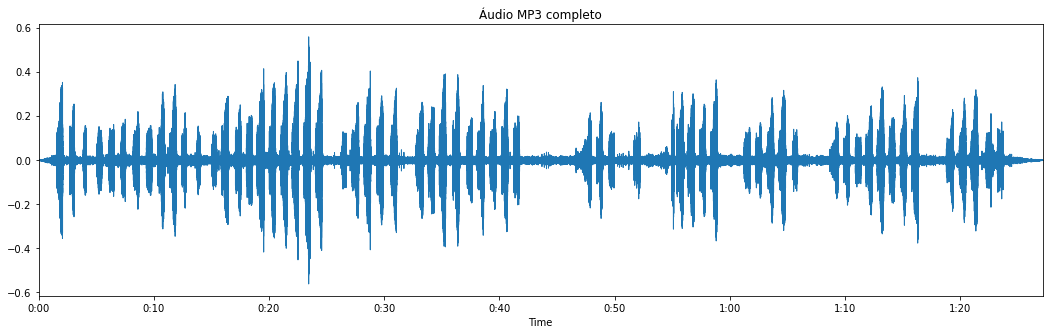

In [97]:
# carregar áudio original em formato MP3
y, sr = librosa.load(entrada, sr=SAMPLE_RATE, mono=True)
duracao = y.shape[0] / sr
print("duracao:", duracao)

# plot recording signal
plt.figure(figsize=(18, 5))
librosa.display.waveplot(y, sr=sr)
plt.title('Áudio MP3 completo')
plt.show()

In [98]:
# calcular o número de cortes a serem efetuados no áudio
numero_cortes = round(duracao / DURACAO_TRECHO)
print("numero_cortes:", numero_cortes)

numero_cortes: 17


In [99]:
yc = {}

for corte in np.arange(1, numero_cortes + 1):

    # calcular trechos de início e fim no áudio
    inicio = PONTOS_ONDA * (corte - 1)
    termino = PONTOS_ONDA * corte

    yc[corte] = y[inicio:termino]
        
yc.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

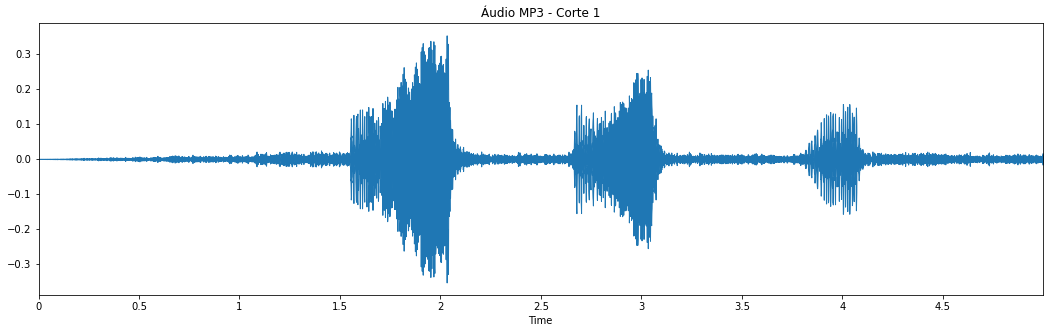

In [100]:
# plot recording signal - corte 1
plt.figure(figsize=(18, 5))
librosa.display.waveplot(yc[1], sr=sr)
plt.title('Áudio MP3 - Corte 1')
plt.show()

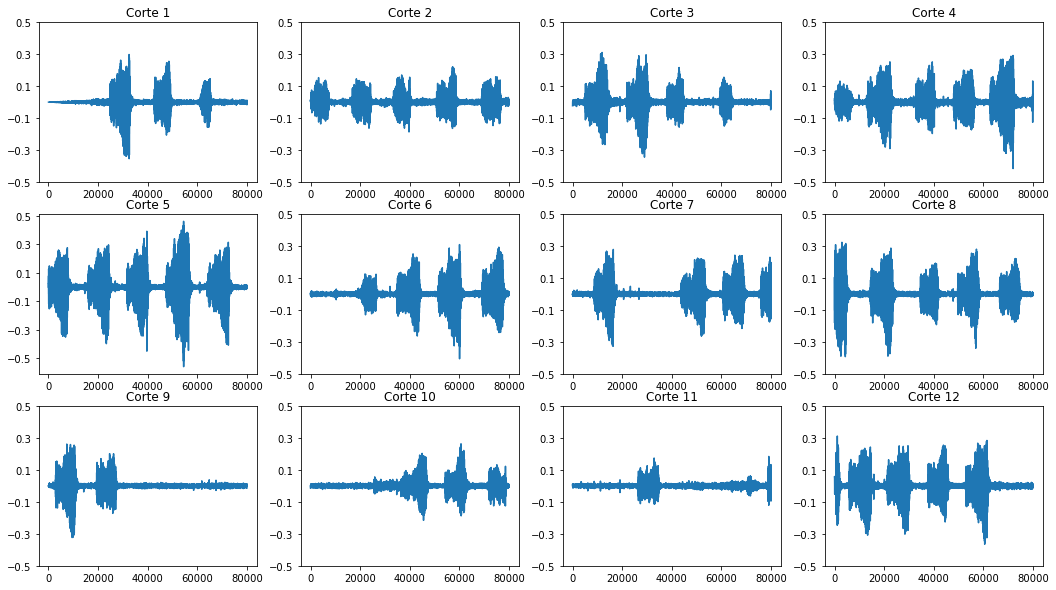

In [101]:
rows = 3
cols = 4
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(18, 10))

for i, (corte, audio) in enumerate(yc.items()):
    if i >= n:
        break
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    ax.plot(audio)
    ax.set_yticks(np.arange(-0.5, 0.6, 0.2))
    ax.set_title("Corte %d" % corte)

plt.show()

    especie	        arquivos_mp3	arquivos_wav	diferenca	multiplicacao
    columba_livia	40	            543	            3097	    77.0

In [102]:
print("DURACAO_TRECHO:", DURACAO_TRECHO, "s")
print("SAMPLE_RATE:", SAMPLE_RATE, "Hz")
print("PONTOS_ONDA:", PONTOS_ONDA)
print()
multiplicacao = 77.0
diferenca = 3097
print("multiplicacao:", multiplicacao)
print("diferenca:", diferenca)
print()
print("duracao:", duracao, "s")
print("numero_cortes:", numero_cortes)

DURACAO_TRECHO: 5 s
SAMPLE_RATE: 16000 Hz
PONTOS_ONDA: 80000

multiplicacao: 77.0
diferenca: 3097

duracao: 87.1939375 s
numero_cortes: 17


In [103]:
multiplicacao / numero_cortes

4.529411764705882

In [104]:
numero_variacoes = round(multiplicacao / numero_cortes)
print("numero_variacoes:", numero_variacoes)

numero_variacoes: 5


In [154]:
yr = {}

for variacao in np.arange(1, numero_variacoes + 1):
    #print("variacao:", variacao)
    #delta = PONTOS_ONDA / (variacao + 1)
    
    tamanho_roll = variacao * int(PONTOS_ONDA / (variacao + 1))
    print("--> tamanho_roll:", tamanho_roll)
    
    # deslocar o sinal
    #yr[variacao] = np.roll(y, tamanho_roll)

    # adicionar ruído ao sinal
    sinal = np.roll(y, tamanho_roll)
    sinal_ruido = sinal + 0.009 * np.random.normal(0, 1, len(sinal))
    yr[variacao] = sinal_ruido
    
yr.keys()

--> tamanho_roll: 40000
--> tamanho_roll: 53332
--> tamanho_roll: 60000
--> tamanho_roll: 64000
--> tamanho_roll: 66665


dict_keys([1, 2, 3, 4, 5])

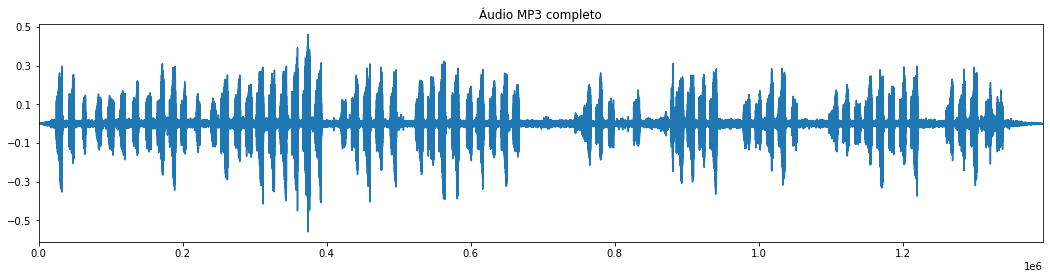

In [155]:
plt.figure(figsize=(18, 4))
plt.plot(y)
plt.xlim(0, y.shape[0])
plt.yticks(np.arange(-0.5, 0.6, 0.2))
plt.title('Áudio MP3 completo')
plt.show()

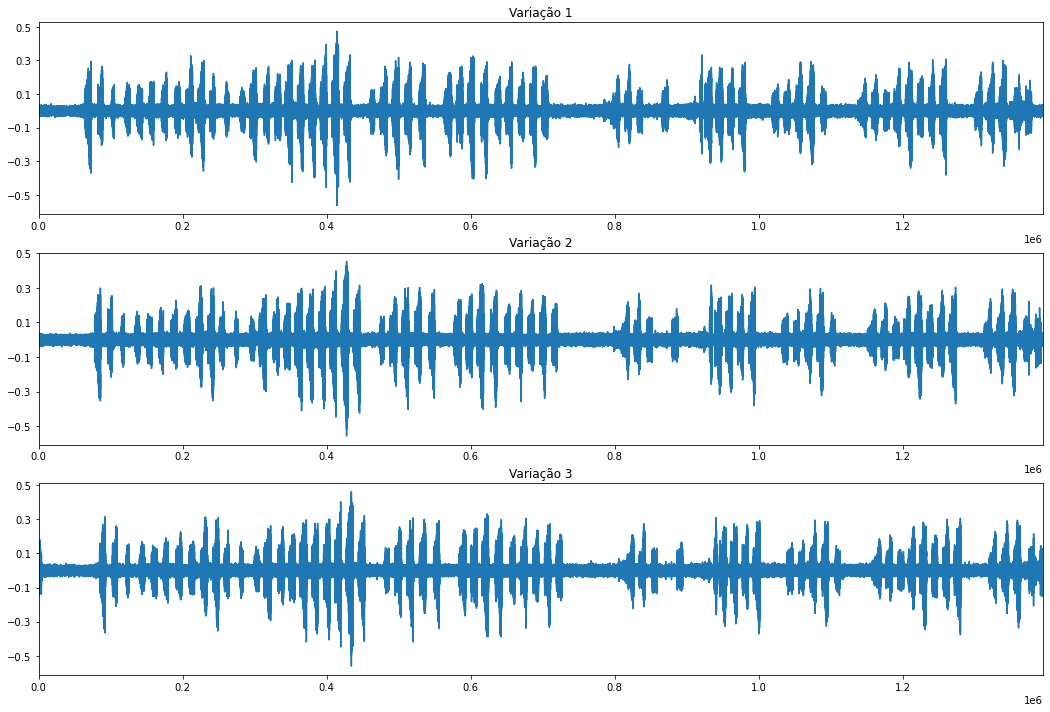

In [156]:
rows = 3
cols = 1
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(18, 12))

for i, (variacao, audio) in enumerate(yr.items()):
    if i >= n:
        break
    r = i // cols
    c = i % cols
    ax = axes[r]
    ax.plot(audio)
    ax.set_yticks(np.arange(-0.5, 0.6, 0.2))
    ax.set_xlim(0, audio.shape[0])
    ax.set_title("Variação %d" % variacao)

plt.show()

In [157]:
yrc = {}

for variacao in np.arange(1, numero_variacoes + 1):
    yrc[variacao] = {}
    
    for corte in np.arange(1, numero_cortes + 1):

        # calcular trechos de início e fim no áudio
        inicio = PONTOS_ONDA * (corte - 1)
        termino = PONTOS_ONDA * corte
        
        yrc[variacao][corte] = yr[variacao][inicio:termino]
        
yrc.keys()

dict_keys([1, 2, 3, 4, 5])

In [158]:
def plot_variacao_cortes(variacao = 1):
    
    rows = 3
    cols = 4
    n = rows * cols
    fig, axes = plt.subplots(rows, cols, figsize=(18, 10))

    for i, (corte, audio) in enumerate(yrc[variacao].items()):
        if i >= n:
            break
        r = i // cols
        c = i % cols
        ax = axes[r][c]
        ax.plot(audio)
        ax.set_yticks(np.arange(-0.5, 0.6, 0.2))
        ax.set_title("Var %d, Corte %d" % (variacao, corte))

    plt.show()

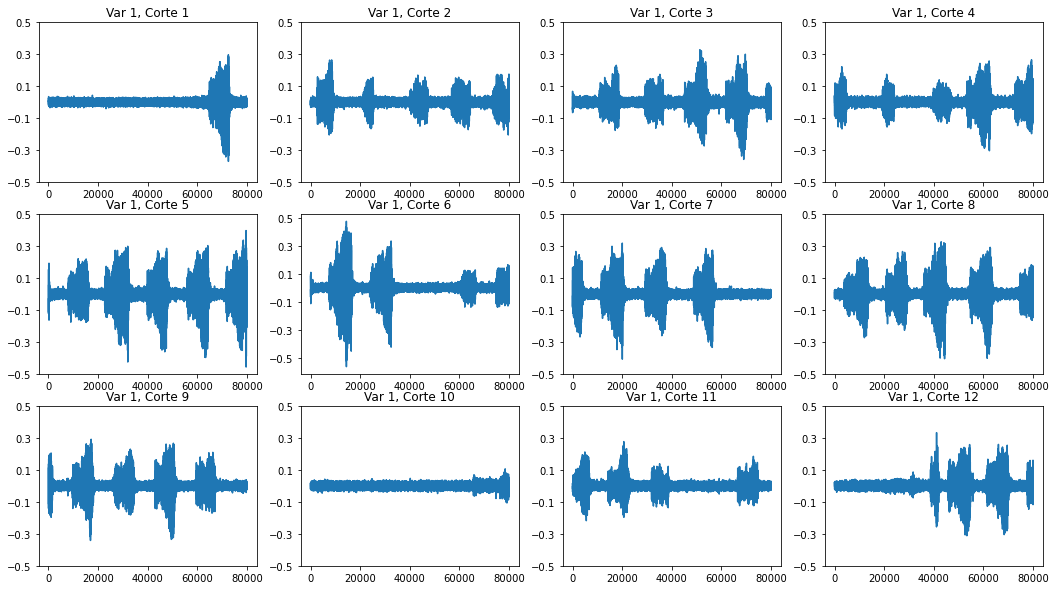

In [159]:
plot_variacao_cortes(1)

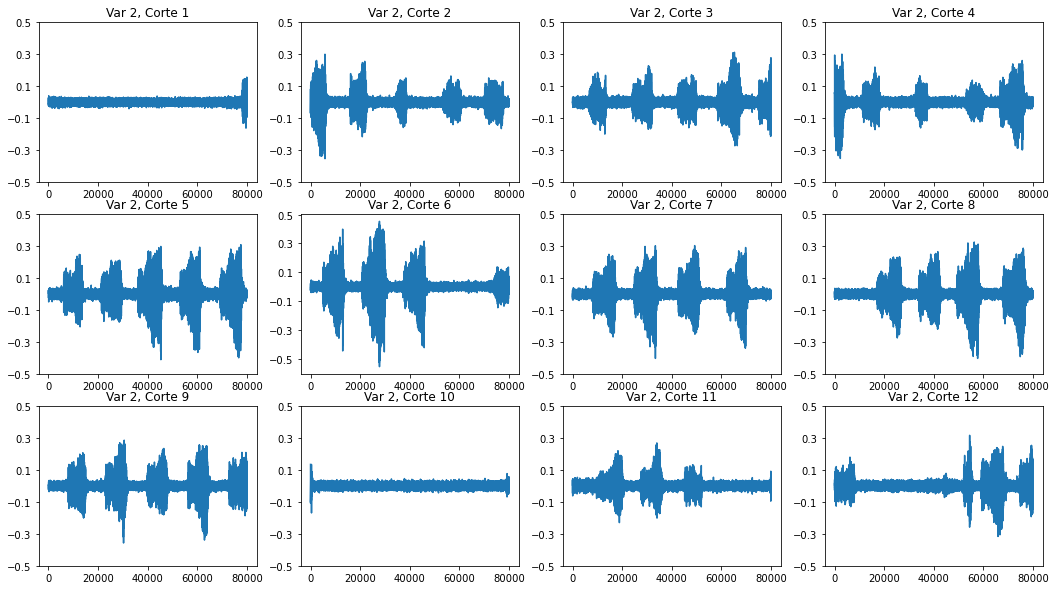

In [160]:
plot_variacao_cortes(2)